# Employee Salary Prediction

This notebook performs data cleaning, exploratory data analysis (EDA), feature engineering, and trains a machine learning model to predict whether an employee's salary is >50K or <=50K.

## 1. Import Libraries

In [3]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib

     ---------------------------------------- 11.1/11.1 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 12.9/12.9 MB 864.1 kB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 1.9 MB/s eta 0:00:00
     ------------------------------------ 294.9/294.9 kB 651.4 kB/s eta 0:00:00
     -------------------------------------- 10.7/10.7 MB 667.6 kB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


Matplotlib is building the font cache; this may take a moment.


## 2. Load Dataset

In [6]:
data = pd.read_csv("./adult 3.csv")
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 3. Initial Data Inspection

In [7]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## 4. Data Cleaning

In [8]:
# Replace "?" with NaN and drop rows with missing values
data.replace(" ?", np.nan, inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


## 5. EDA (Exploratory Data Analysis)

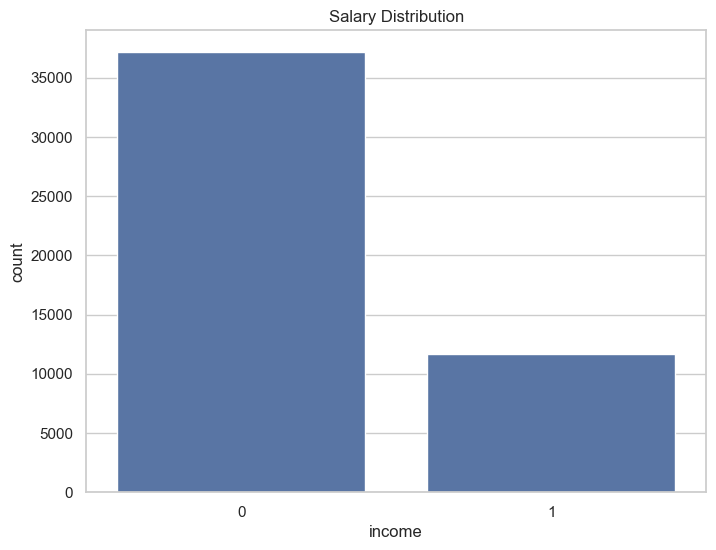

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=data)
plt.title("Salary Distribution")
plt.show()


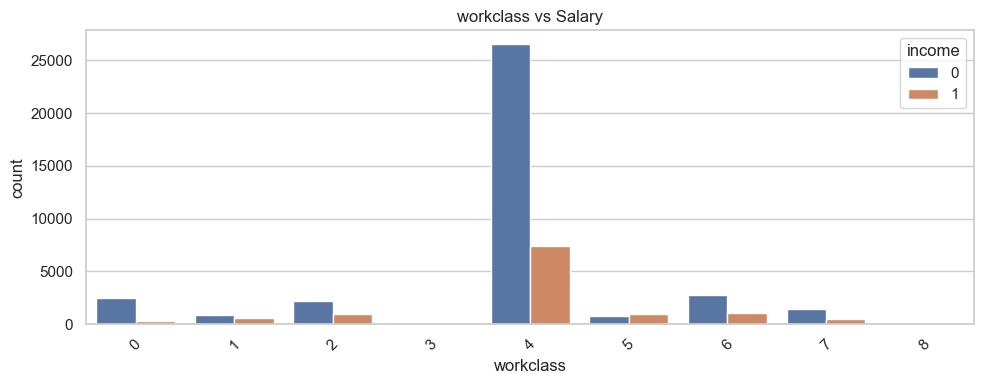

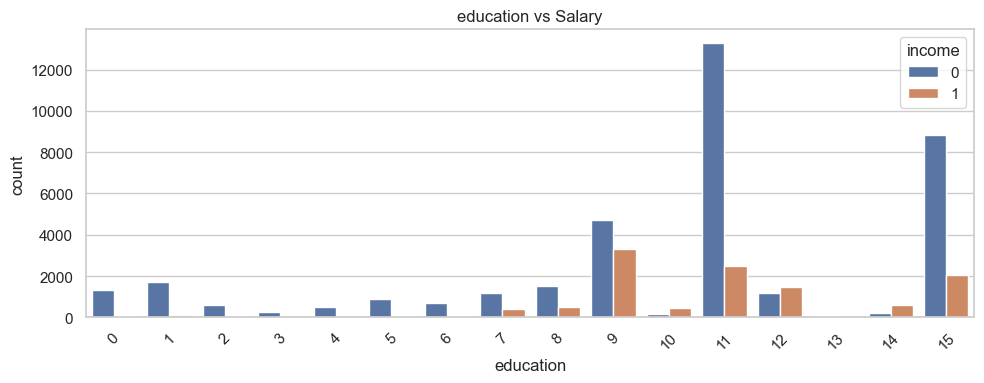

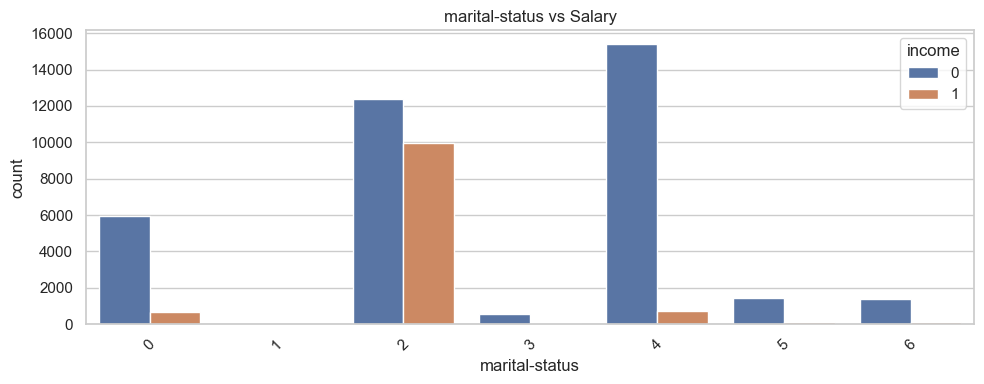

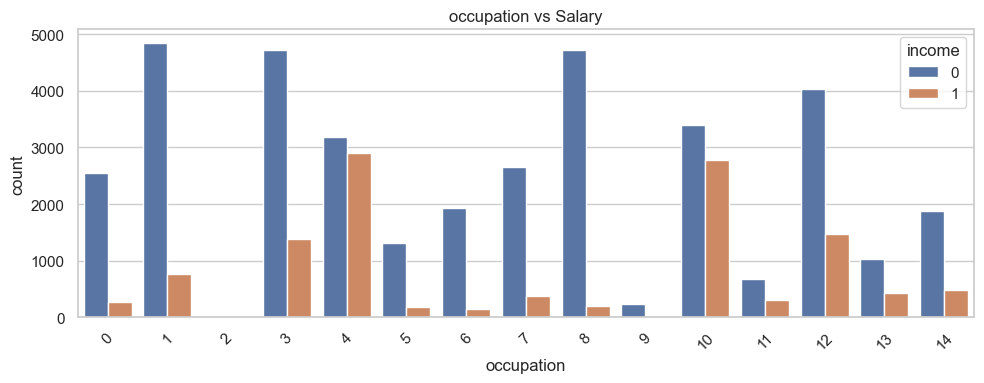

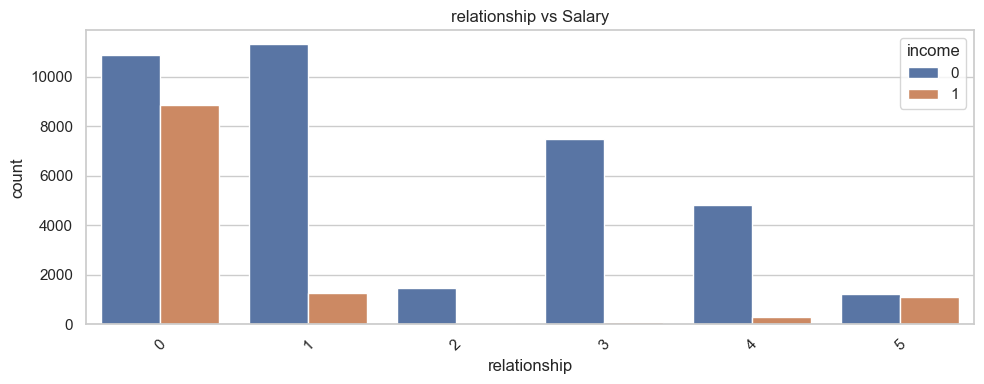

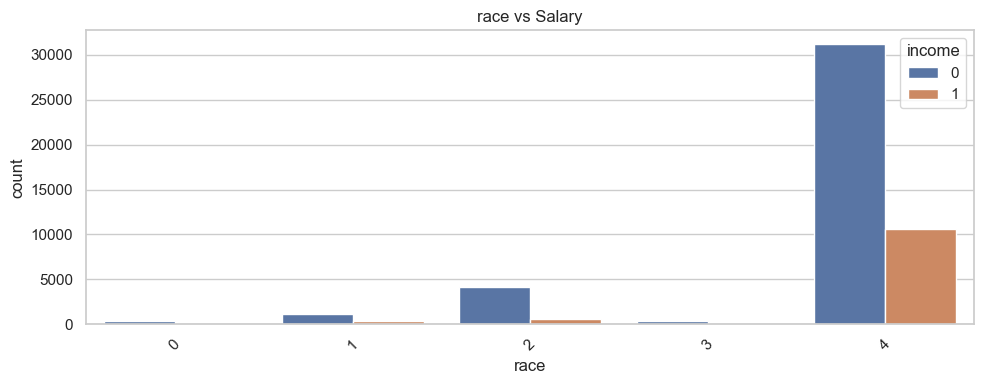

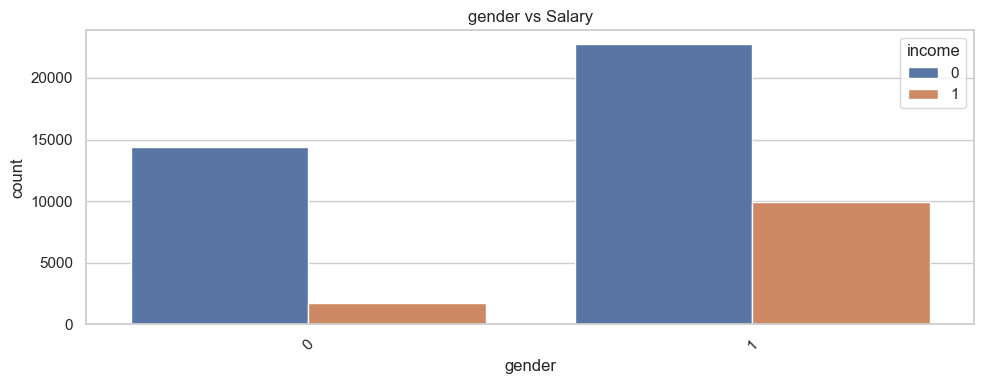

In [17]:
# Plotting feature vs salary
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='income', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Salary')
    plt.tight_layout()
    plt.show()


## 6. Data Preprocessing & Feature Encoding

In [18]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


## 7. Train-Test Split

In [19]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8. Model Training

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 9. Model Evaluation

In [21]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8639574163169209
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



## 10. Save Model and Encoders

In [23]:
import os
os.makedirs("../backend/model", exist_ok=True)
joblib.dump(model, os.path.join("../backend/model", "salary_model.pkl"))
joblib.dump(label_encoders, os.path.join("../backend/model", "label_encoders.pkl"))

['../backend/model\\label_encoders.pkl']